In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('legend', fontsize=10)

In [3]:
# Use steady state values for gating variables.
gKs=50
EK=-80  
minfKs = lambda V: 1/(1+np.exp((V+12.85)/(-19.91)))  
Iks = lambda V: gKs*minfKs(V)**4*(V-EK)

gKf=24.1
fh=.95

minfKf = lambda V: 1/(1+np.exp((V+17.55)/(-7.27)))  
hinfK = lambda V: 1/(1+np.exp((V+45)/6))  
hinfK2 = lambda V: 1/(1+np.exp((V+44.2)/1.5))
Ikf = lambda V: gKf*minfKf(V)**4*(fh*hinfK(V) + (1-fh)*hinfK2(V))*(V-EK)  

ENa = 45
gNa = 100
minfNa = lambda V: 1/(1+np.exp((V+29.13)/(-8.922)))
hinfNa = lambda V: 1/(1+np.exp((V+40)/6.048))
Ina = lambda V: gNa*minfNa(V)**3*hinfNa(V)*(V-ENa)

gNaP = 0.8
minfNap = lambda V: 1/(1+np.exp((V+48.77)/(-3.68)))
Inap = lambda V: gNaP*minfNap(V)*(V-ENa)

gleak = 6.8 
Eleak = -55
Iinf = lambda V, I: Iks(V)+Ikf(V)+Ina(V)+Inap(V)+gleak*(V-Eleak) - I

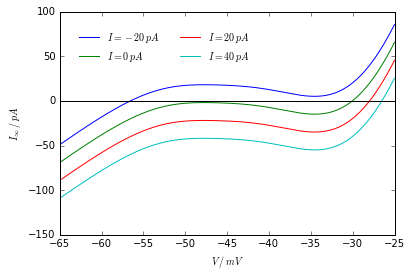

In [4]:
voltages = np.linspace(-65, -25, 500)
for I in [-20, 0, 20, 40]:
    plt.plot(voltages, Iinf(voltages, I), label='$I = {0} \: pA$'.format(I))
plt.axhline(0, c='black')
plt.xlabel('$V \: / \: mV$')
plt.ylabel('$I_{\infty} \: / \: pA$')
plt.legend(loc='upper left', ncol=2, numpoints=1, borderaxespad=1.5, frameon=False)
plt.savefig('I-V-curve.png', dpi=300)